# Association Matrix

## Session Setup

In [1]:
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.datasets import load_iris

In [2]:
from pyspark_ds_toolbox.stats.association import Association

In [3]:
spark = SparkSession.builder\
                .appName('Ml-Pipes') \
                .master('local[1]') \
                .config('spark.executor.memory', '3G') \
                .config('spark.driver.memory', '3G') \
                .config('spark.memory.offHeap.enabled', 'true') \
                .config('spark.memory.offHeap.size', '3G') \
                .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/21 18:18:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Testing the Association Class

In [4]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_sdf = spark.createDataFrame(iris_df)
iris_ks = iris_sdf.to_pandas_on_spark()

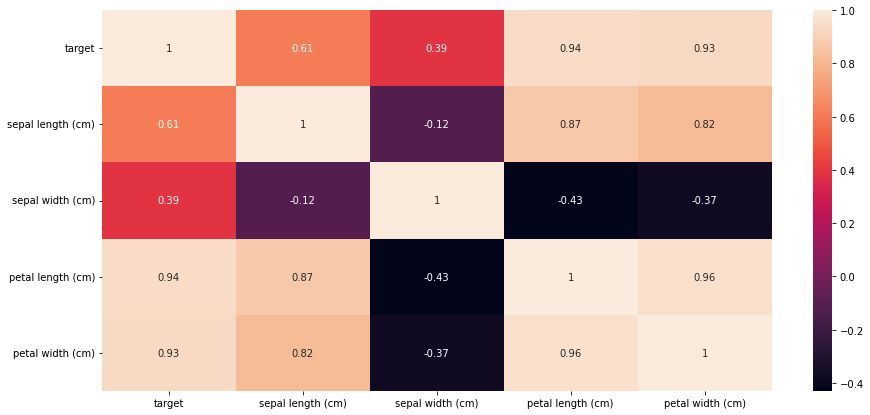

In [5]:
A = Association()
categorical_features = ['target']
numerical_features = ['sepal length (cm)', 
                      'sepal width (cm)', 
                      'petal length (cm)',
                      'petal width (cm)']

df = A.association_matrix(
    iris_sdf.to_pandas_on_spark(),
    categorical_features=categorical_features,
    numerical_features=numerical_features,
    plot_matrix=True,
    return_matrix=True
)

In [6]:
df

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,1.000000,0.613518,0.392630,0.940574,0.927915
sepal length (cm),0.613518,1.000000,-0.117570,0.871754,0.817941
sepal width (cm),0.392630,-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.940574,0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.927915,0.817941,-0.366126,0.962865,1.000000
